# Previous analysis

- Disease defined at dataset level but each dataset contains multiple diseases and healthy samples

- Dataset integration is not recommended. Different datasets adopt different ranges for miRNA values

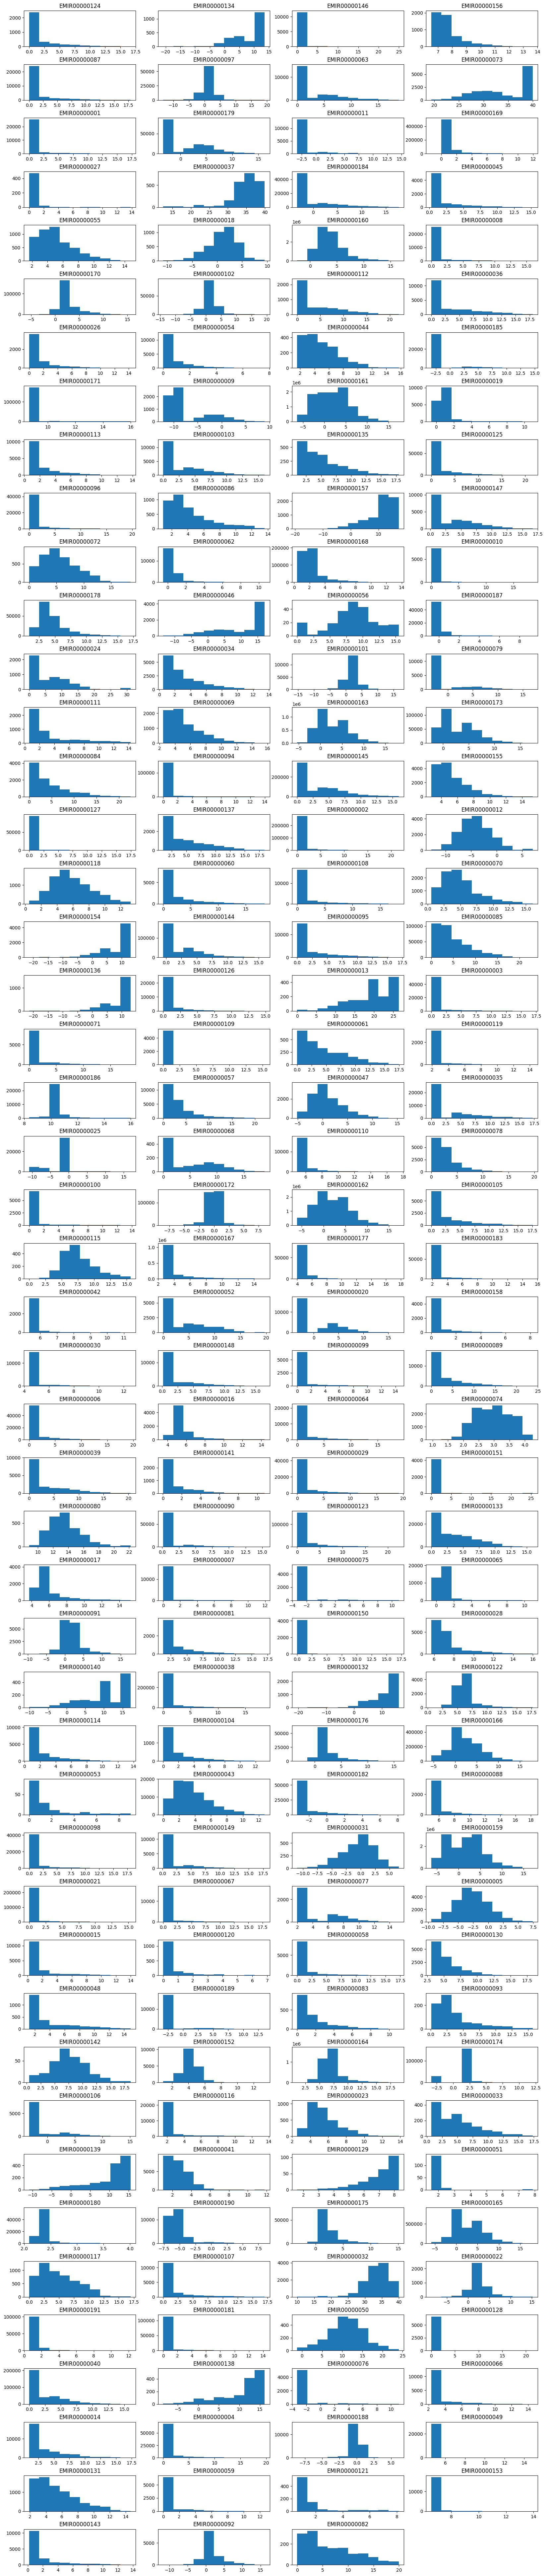

In [69]:
import glob
import pandas as pd
import matplotlib.pyplot as plt


fig, axs = plt.subplots(48, 4, figsize=(20, 100), gridspec_kw={'hspace': 0.5})
for i, filename in enumerate(glob.glob('data/raw/exp/*.csv')):
    values = pd.read_csv(filename, index_col=0).values.flatten()
    axs[i//4, i%4].hist(values)
    axs[i//4, i%4].set_title(filename.split('/')[-1][:-8])

axs[-1, -1].set_visible(False)

plt.show()

# Dataset Selection

### [OpenRefine](https://openrefine.org)

- Retrieve platform technology from [Gene Expression Omnibus](https://0-www-ncbi-nlm-nih-gov.brum.beds.ac.uk/geo/browse/?view=platforms)

  |Technology                 |Datasets |Samples     |
  |---------------------------|--------:|-----------:|
  |high-throughput sequencing |64       |1.473       |
  |spotted oligonucleotide    |35       |24.119      |
  |in situ oligonucleotide    |61       |2.987       |
  |RT-PCR                     |28       |544         |
  |other                      |3        |75          |
  |***Total***                |***191***|***29.198***|
<br/>

- Delete anomalous datasets

  |Dataset                    |Reason                                                                                     |
  |---------------------------|:------------------------------------------------------------------------------------------|
  |EMIR00000005               |RT-PCR technology                                                                          |
  |EMIR00000012               |RT-PCR technology                                                                          |
  |EMIR00000013               |RT-PCR technology                                                                          |
  |EMIR00000018               |RT-PCR technology                                                                          |
  |EMIR00000024               |RT-PCR technology                                                                          |
  |EMIR00000027               |RT-PCR technology                                                                          |
  |EMIR00000031               |RT-PCR technology                                                                          |
  |EMIR00000032               |RT-PCR technology                                                                          |
  |EMIR00000037               |RT-PCR technology                                                                          |
  |EMIR00000046               |RT-PCR technology                                                                          |
  |EMIR00000050               |RT-PCR technology                                                                          |
  |EMIR00000073               |RT-PCR technology                                                                          |
  |EMIR00000083               |RT-PCR technology                                                                          |
  |EMIR00000109               |RT-PCR technology                                                                          |
  |EMIR00000120               |RT-PCR technology                                                                          |
  |EMIR00000128               |RT-PCR technology                                                                          |
  |EMIR00000132               |RT-PCR technology                                                                          |
  |EMIR00000134               |RT-PCR technology                                                                          |
  |EMIR00000136               |RT-PCR technology                                                                          |
  |EMIR00000138               |RT-PCR technology                                                                          |
  |EMIR00000139               |RT-PCR technology                                                                          |
  |EMIR00000140               |RT-PCR technology                                                                          |
  |EMIR00000141               |RT-PCR technology                                                                          |
  |EMIR00000146               |RT-PCR technology                                                                          |
  |EMIR00000150               |RT-PCR technology                                                                          |
  |EMIR00000151               |RT-PCR technology                                                                          |
  |EMIR00000154               |RT-PCR technology                                                                          |
  |EMIR00000157               |RT-PCR technology                                                                          |
  |EMIR00000030               |Other technology                                                                           |
  |EMIR00000041               |Other technology                                                                           |
  |EMIR00000152               |Other technology                                                                           |
  |EMIR00000180               |Inconsistency with EMIR00000177                                                            |
  |EMIR00000091               |Subsets of EMIR00000102                                                                    |
  |EMIR00000092               |Subsets of EMIR00000102                                                                    |
  |EMIR00000097               |Subsets of EMIR00000102                                                                    |
  |EMIR00000101               |Subsets of EMIR00000102                                                                    |
  |EMIR00000010               |Not related to diseases                                                                    |
  |EMIR00000011               |Not related to diseases                                                                    |
  |EMIR00000023               |Not related to diseases                                                                    |
  |EMIR00000026               |Not related to diseases                                                                    |
  |EMIR00000028               |Not related to diseases                                                                    |
  |EMIR00000038               |Not related to diseases                                                                    |
  |EMIR00000081               |Not related to diseases                                                                    |
  |EMIR00000095               |Not related to diseases                                                                    |
  |EMIR00000096               |Not related to diseases                                                                    |
  |EMIR00000123               |Not related to diseases                                                                    |
  |EMIR00000133               |Not related to diseases                                                                    |
  |EMIR00000137               |Not related to diseases                                                                    |
  |EMIR00000158               |Not related to diseases                                                                    |

# Metadata Preprocessing

### [OpenRefine](https://openrefine.org)

- Concatenate metadata files into a single table

- Delete anomalous samples   
  |Reason                                 |Number  |
  |---------------------------------------|-------:|
  |Organism ≠ homo sapiens                |22      |
  |Channel count ≠ 1                      |189     |
  |Molecule ≠ total RNA                   |2       |
  |Disease status not clear (EMIR00000090)|13      |
  |Disease status not clear (EMIR00000008)|4       |
  |Disease status not clear (EMIR00000067)|3       |
  |Disease status not clear (EMIR00000102)|30      |
  |Disease status not clear (EMIR00000166)|9       |
  |Disease status not clear (EMIR00000168)|9       |
<br/>

- Add dataset-level features

- Split and transpose *key:value* features

- Merge equivalent features associated to different datasets

- Rename features consistently

- Delete irrelevant or redundant features (e.g. *state* has an almost 1:1 relationship with *city*)

- Delete features where missing values ⪆ 98%

- Refine dataset-level features (based on majority class) using sample-level data
        
- Detect healthy samples in each dataset

- Standardize *age*, *sex*, *city*, *disease*, *disease_type* features

In [70]:
import pandas as pd


metadata = pd.read_csv('data/PD.csv', index_col=0)

# Delete samples whose disease occurs less than 5 times in a dataset
metadata = metadata[metadata.groupby(['dataset', 'disease']).disease.transform('size') >= 5]

# Delete datasets with a unique disease value
to_remove = [index for index, value in (metadata.groupby('dataset').disease.nunique() == 1).items() if value]
metadata = metadata[~metadata.dataset.isin(to_remove)]

# Sort data by sample_id
metadata = metadata.sort_index()
metadata.to_csv('data/PD.csv')
metadata

,dataset,technology,country,city,sample_type,sex,age,disease,disease_type,body_site,stage
sample_id,,,,,,,,,,,
GSM1081746,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,63.0,Breast cancer,Cancer,Breast,NaN
GSM1081747,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,46.0,Healthy control,NaN,NaN,NaN
GSM1081748,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,44.0,Breast cancer,Cancer,Breast,NaN
GSM1081749,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,65.0,Healthy control,NaN,NaN,NaN
GSM1081750,EMIR00000168,in situ oligonucleotide,USA,Research Triangle Park,Serum circulating miRNA,NaN,59.0,Healthy control,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
GSM989224,EMIR00000102,in situ oligonucleotide,Japan,Chuo-ku,Serum derived exosomes,M,55.0,Colorectal cancer,Cancer,Intestine,IIIB (tnm)
GSM989225,EMIR00000102,in situ oligonucleotide,Japan,Chuo-ku,Serum derived exosomes,M,64.0,Colorectal cancer,Cancer,Intestine,IIIB (tnm)
GSM989226,EMIR00000102,in situ oligonucleotide,Japan,Chuo-ku,Serum derived exosomes,M,51.0,Colorectal cancer,Cancer,Intestine,IV (tnm)


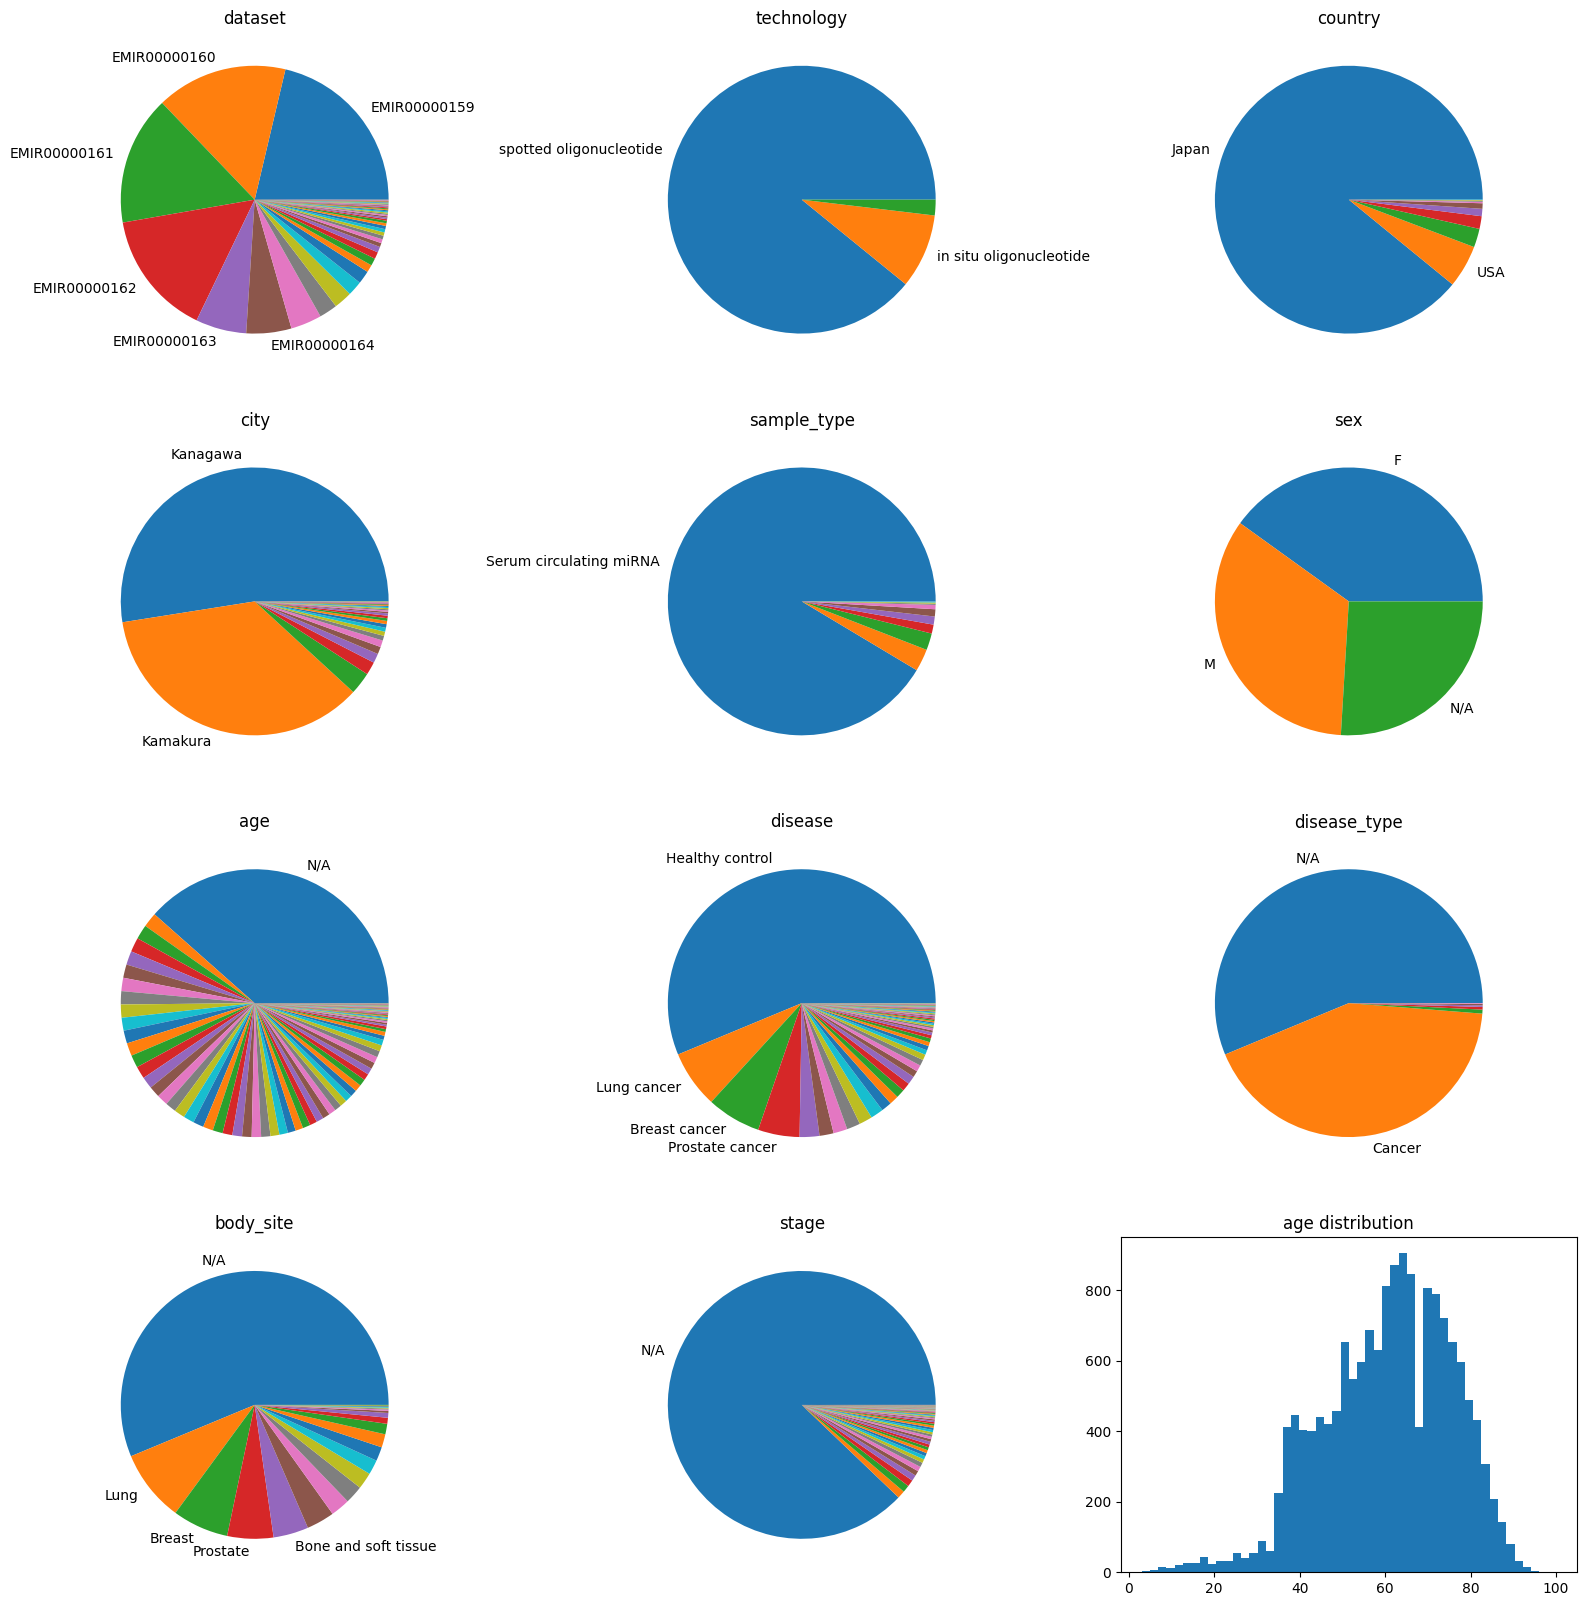

In [71]:
import pandas as pd
import matplotlib.pyplot as plt


metadata = pd.read_csv('data/PD.csv', index_col=0)

# Visualize feature distribution
fig, axs = plt.subplots(4, 3, figsize=(20, 20))
for i, column in enumerate(metadata.columns):
    counts = metadata[column].value_counts(dropna=False)
    labels = [label if count > 1000 else '' for count, label in zip(counts, counts.index)]
    labels = ['N/A' if pd.isnull(label) else label for label in labels]
    axs[i//3, i%3].set_title(f'{column}')
    axs[i//3, i%3].pie(counts, labels=labels)

axs[-1, -1].set_title('age distribution')
axs[-1, -1].hist(metadata.age, bins=50)
plt.show()

# miRNA Preprocessing

### [miRBaseConverter](https://taoshengxu.shinyapps.io/mirbaseconverter/)

- Convert miRNA names to miRBase latest version

- Retrieve miRNA sequence

In [72]:
import pandas as pd


mirna = pd.read_csv('data/miRNA.tsv', sep='\t')
name_converter = dict(zip(mirna.OriginalName, mirna.miRNAName_v22))

def convert_miRNA_name(name):
    name = name.strip()
    name = name.split('_v1')[0]
    name = name.split('_v2')[0]
    return name_converter[name]

values = []
datasets = pd.read_csv('data/PD.csv').groupby('dataset').sample_id.agg(list).to_dict()
for dataset, samples in datasets.items():

    # Strip, remove version suffix and update miRNA names
    df = pd.read_csv(f'data/raw/exp/{dataset}_exp.csv', converters={0: convert_miRNA_name})

    # Delete unknown miRNA
    df.dropna(subset=df.columns[0], inplace=True)

    # Delete repeated miRNA (anomaly)
    df.drop_duplicates(df.columns[0], inplace=True)

    # Transpose data
    df = df.set_index(df.columns[0]).T.rename_axis('sample_id')

    # Delete samples not included in metadata
    df = df.loc[samples]
    values.append(df)

# Concatenate data into a single dataframe
values = pd.concat(values)

# Sort data by sample_id
values = values.sort_index()
values.to_csv('data/EXP.csv')
values

Unnamed: 0,hsa-miR-486-5p,hsa-miR-122-5p,hsa-miR-423-5p,hsa-miR-451a,hsa-miR-92a-3p,hsa-let-7b-5p,hsa-miR-10b-5p,hsa-miR-320a-3p,hsa-miR-10a-5p,hsa-miR-99a-5p,...,hsa-miR-135a-2-3p,hsa-miR-137-5p,hsa-miR-147b-5p,hsa-miR-190b-3p,hsa-miR-1912-5p,hsa-miR-196a-1-3p,hsa-miR-217-3p,hsa-miR-320a-5p,hsa-miR-375-5p,hsa-miR-519a-2-5p
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM1081746,9.842000,5.740000,5.353000,8.016000,8.976000,8.951,1.692000,8.147000,1.920000,1.661000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1081747,9.722000,5.899000,4.476000,9.125000,9.184000,9.527,2.667000,7.005000,1.938000,2.192000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1081748,8.466000,2.251000,3.964000,8.583000,7.229000,8.788,2.683000,7.042000,2.152000,2.518000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1081749,3.725000,1.160000,1.191000,6.584000,2.629000,2.062,2.846000,2.292000,2.531000,2.205000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM1081750,9.960000,2.170000,3.698000,8.743000,8.927000,8.476,2.306000,7.787000,2.123000,2.136000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM989224,1.286828,3.055074,-1.108253,6.686869,3.133780,NaN,2.926098,2.566769,1.178645,1.815485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM989225,1.531735,2.124445,0.828513,6.165665,2.046011,NaN,1.184656,5.003374,1.570707,0.241790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSM989226,10.537140,1.892556,2.907918,4.585476,0.199452,NaN,0.775037,4.468402,1.110949,1.030714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Graph Construction

### [RNABERT](https://github.com/mana438/RNABERT)

In [73]:
import pandas as pd
import torch
from collections import OrderedDict
from RNABERT.bert import get_config, BertModel, BertForMaskedLM


config = get_config('RNABERT/RNA_bert_config.json')
config.hidden_size = config.num_attention_heads * config.multiple

model = BertModel(config)
model = BertForMaskedLM(config, model).eval()

state_dict = torch.load('RNABERT/bert_mul_2.pth', map_location='cpu')
model.load_state_dict(OrderedDict((key[7:], value) for key, value in state_dict.items()))

mirna = pd.read_csv('data/miRNA.tsv', sep='\t').dropna()
mirna = dict(zip(mirna.miRNAName_v22, mirna.miRNASequence_v22))

# Compute embeddings for miRNA sequences
mapping = {'A': 2, 'U': 3, 'G': 4, 'C': 5}
for name, sequence in mirna.items():
    input = [mapping[c] for c in sequence] + [0] * (config.max_position_embeddings - len(sequence))
    encoded_layers = model(torch.tensor([input]))[-1]
    mirna[name] = torch.mean(encoded_layers[0], dim=0).detach().numpy()

torch.save(mirna, 'data/torch/miRNA-emb.pt')

### [PyTorch Geometric](https://pyg.org)

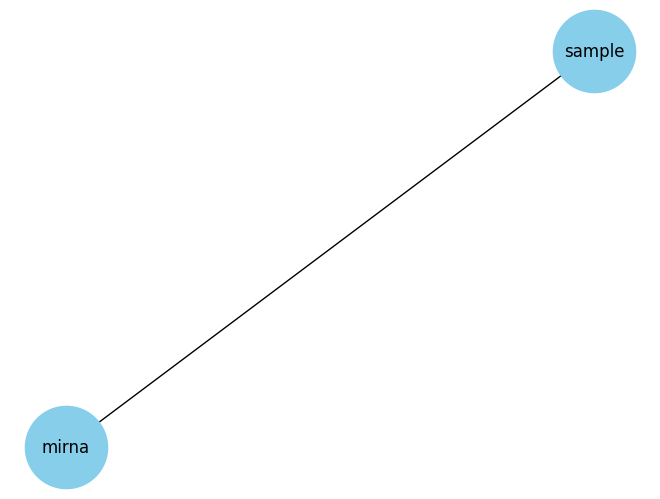


Node number
sample                             : 25957
mirna                              : 2588

Edge number
('sample', 'to', 'mirna')          : 61230421
('mirna', 'rev_to', 'sample')      : 61230421

Node features
sample                             : 104
mirna                              : 120

Edge features
('sample', 'to', 'mirna')          : 1
('mirna', 'rev_to', 'sample')      : 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from torch_geometric.data import HeteroData
from torch_geometric.transforms import ToUndirected


data = HeteroData()
metadata = pd.read_csv('data/PD.csv', index_col=0).reset_index(drop=True)
values = pd.read_csv('data/EXP.csv', index_col=0).reset_index(drop=True)

# Set features for 'sample' nodes
xs = torch.tensor(pd.get_dummies(metadata[['dataset', 'technology', 'country', 'city', 'sample_type', 'sex']]).values, dtype=torch.float)
age = torch.tensor(np.nan_to_num(minmax_scale(metadata.age), nan=-1), dtype=torch.float).unsqueeze(1)
data['sample'].x = torch.cat((xs, age), dim=1)

# Set class labels for 'sample' nodes
data['sample'].y = torch.tensor(metadata.disease.factorize()[0])

# Split 'sample' nodes into training and test, stratifying by 'dataset' and 'disease' columns
train, test = train_test_split(metadata.index, test_size=0.2, random_state=42, stratify=metadata[['dataset', 'disease']])
data['sample'].train_mask = torch.zeros(data['sample'].num_nodes, dtype=torch.bool)
data['sample'].test_mask = torch.zeros(data['sample'].num_nodes, dtype=torch.bool)
data['sample'].train_mask[train] = True
data['sample'].test_mask[test] = True

# Set features for 'mirna' nodes
embeddings = torch.load('data/torch/miRNA-emb.pt')
data['mirna'].x = torch.tensor(np.array([embeddings[name] for name in values.columns]))

# Set edges
rows, cols = np.where(~np.isnan(values))
data['sample', 'mirna'].edge_index = torch.tensor(np.array([rows, cols]))

# Set edge features
data['sample', 'mirna'].edge_attr = torch.tensor(values.values[rows, cols], dtype=torch.float)

# Create undirected graph by adding reverse edges
data = ToUndirected()(data)

# Check that edge_index hold indices in the range [0, num_nodes-1]
data.validate(raise_on_error=True)

# Visualize graph schema
schema = nx.Graph()
schema.add_nodes_from(data.node_types)
schema.add_edges_from((e[0], e[2]) for e in data.edge_types)
nx.draw_kamada_kawai(schema, with_labels=True, node_color='skyblue', node_size=3500)
plt.show()

# Print graph properties
print(f'\033[1m\nNode number\033[0m')
for ntype in data.node_types:
   print(f'{ntype:<35}:', data[ntype].num_nodes)

print(f'\033[1m\nEdge number\033[0m')
for etype in data.edge_types:
   print(f'{str(etype):<35}:', data[etype].num_edges)

print(f'\033[1m\nNode features\033[0m')
for ntype in data.node_types:
   print(f'{ntype:<35}:', data[ntype].num_node_features)

print(f'\033[1m\nEdge features\033[0m')
for etype in data.edge_types:
   print(f'{str(etype):<35}:', data[etype].num_edge_features)

# Save graph
torch.save(data, 'data/torch/graph.pt')

# Heterogenous Graph Neural Network

In [1]:
import torch
from torch_geometric import seed_everything, compile
from torch_geometric.nn import GAT, to_hetero


seed_everything(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = torch.load('data/torch/graph.pt')
test_data = data.subgraph({'sample': data['sample'].test_mask}).to(device)

# Initialize GNN
model = GAT(
    in_channels=(-1, -1),
    hidden_channels=64,
    num_layers=2,
    out_channels=len(data['sample'].y.unique()),
    v2=True,
    jk='cat',
    edge_dim=1,
    add_self_loops=False
)

# Convert homogenous GNN to heterogenous GNN
model = to_hetero(model, data.metadata()).to(device)
compile(model)

OptimizedModule(
  (_orig_mod): GraphModule(
    (_trim): ModuleDict(
      (sample__to__mirna): TrimToLayer()
      (mirna__rev_to__sample): TrimToLayer()
    )
    (convs): ModuleList(
      (0): ModuleDict(
        (sample__to__mirna): GATv2ConvJittable_390062((-1, -1), 64, heads=1)
        (mirna__rev_to__sample): GATv2ConvJittable_0cce35((-1, -1), 64, heads=1)
      )
      (1): ModuleDict(
        (sample__to__mirna): GATv2ConvJittable_8cd0a4((64, 64), 64, heads=1)
        (mirna__rev_to__sample): GATv2ConvJittable_7d6277((64, 64), 64, heads=1)
      )
    )
    (norms): ModuleList(
      (0-1): 2 x ModuleDict(
        (sample): Identity()
        (mirna): Identity()
      )
    )
    (act): ModuleDict(
      (sample): ReLU()
      (mirna): ReLU()
    )
    (dropout): ModuleDict(
      (sample): Dropout(p=0.0, inplace=False)
      (mirna): Dropout(p=0.0, inplace=False)
    )
    (jk): ModuleDict(
      (sample): JumpingKnowledge(cat)
      (mirna): JumpingKnowledge(cat)
    )
   

### Training

In [ ]:
import tqdm
from torch_geometric.loader import NeighborLoader
from torch.nn.functional import cross_entropy
from sklearn.metrics import accuracy_score


# Define loader for mini-batch training
train_loader = NeighborLoader(
    data,
    input_nodes=('sample', data['sample'].train_mask),
    num_neighbors=[-1],
    subgraph_type='induced',
    batch_size=256,
    shuffle=True
)

# Perform mini-batch training with early stopping
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
best_accuracy = -1
best_epoch = -1
patience = 20
for epoch in range(1, 1000):

    model.train()
    total_loss = 0
    for batch in tqdm.tqdm(train_loader):
        batch = batch.to(device)
        optimizer.zero_grad()                                                               # Clear gradients
        out = model(batch.x_dict, batch.edge_index_dict, edge_attr=batch.edge_attr_dict)    # Perform a forward pass
        loss = cross_entropy(out['sample'], batch['sample'].y)                              # Compute loss
        loss.backward()                                                                     # Derive gradients
        optimizer.step()                                                                    # Update parameters based on gradients
        total_loss += float(loss) * batch['sample'].batch_size
    total_loss /= int(data['sample'].train_mask.sum())

    # Evaluate model on test data
    with torch.no_grad():
        model.eval()
        out = model(test_data.x_dict, test_data.edge_index_dict, edge_attr=test_data.edge_attr_dict)
        accuracy = accuracy_score(test_data['sample'].y, out['sample'].argmax(dim=1))
    print(f'Epoch: {epoch:03d}, Loss: {total_loss:.4f}, Test Accuracy: {accuracy:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_epoch = epoch
        torch.save({
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'epoch': epoch,
            'loss': total_loss,
            'accuracy': accuracy
            }, 'data/torch/checkpoint.pt')
    elif epoch - best_epoch > patience:
        print(f'Early stopping at epoch {epoch}')
        break

### Evaluation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE


checkpoint = torch.load('data/torch/checkpoint.pt')
model.load_state_dict(checkpoint['model'])

with torch.no_grad():
    model.eval()
    out = model(test_data.x_dict, test_data.edge_index_dict, edge_attr=test_data.edge_attr_dict)

# Print classification report
metadata = pd.read_csv('data/PD.csv', index_col=0)
prediction = out['sample'].argmax(dim=1)
print(classification_report(test_data['sample'].y, prediction, target_names=metadata.disease.unique(), zero_division=0))

# Visualize a two-dimensional representation of node embeddings
z = TSNE(n_components=2).fit_transform(out['sample'].detach().cpu().numpy())
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.scatter(z[:,0], z[:,1], s=3, c=test_data['sample'].y, cmap='Set2')
plt.show()

# Tabular Data

### Multilayer Perceptron

In [1]:
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


metadata = pd.read_csv('data/PD.csv', index_col=0)
values = pd.read_csv('data/EXP.csv', index_col=0)

X = metadata.merge(values, left_index=True, right_index=True).drop(columns=['disease', 'disease_type', 'body_site', 'stage'])
X.age = minmax_scale(X.age)
X = pd.get_dummies(X).fillna(-1)
X_train, X_test, y_train, y_test = train_test_split(X, metadata.disease, test_size=0.2, random_state=42, stratify=metadata[['dataset', 'disease']])

model = MLPClassifier(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

                                             precision    recall  f1-score   support

        Acquired immune deficiency syndrome       0.71      1.00      0.83         5
        Benign bone and soft tissue disease       0.68      0.75      0.71        88
                      Benign breast disease       0.00      0.00      0.00        13
                     Benign ovarian disease       0.44      0.50      0.47         8
Benign pancreatic or biliary tract diseases       0.00      0.00      0.00         4
                    Benign prostate disease       0.59      0.79      0.68        29
                      Benign thyroid nodule       0.50      0.50      0.50         2
                       Biliary tract cancer       0.75      0.47      0.58        38
                             Bladder cancer       0.88      0.90      0.89        89
                   Borderline ovarian tumor       0.18      0.15      0.17        13
                              Breast cancer       0.86      0.88

### Bagging Classifier

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report


metadata = pd.read_csv('data/PD.csv', index_col=0)
values = pd.read_csv('data/EXP.csv', index_col=0)

X = metadata.merge(values, left_index=True, right_index=True).drop(columns=['disease', 'disease_type', 'body_site', 'stage'])
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, metadata.disease, test_size=0.2, random_state=42, stratify=metadata[['dataset', 'disease']])

model = BaggingClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

                                             precision    recall  f1-score   support

        Acquired immune deficiency syndrome       0.80      0.80      0.80         5
        Benign bone and soft tissue disease       0.73      0.88      0.80        88
                      Benign breast disease       0.50      0.08      0.13        13
                     Benign ovarian disease       1.00      0.12      0.22         8
Benign pancreatic or biliary tract diseases       0.00      0.00      0.00         4
                    Benign prostate disease       0.94      0.59      0.72        29
                      Benign thyroid nodule       0.00      0.00      0.00         2
                       Biliary tract cancer       0.53      0.45      0.49        38
                             Bladder cancer       0.76      0.88      0.81        89
                   Borderline ovarian tumor       0.00      0.00      0.00        13
                              Breast cancer       0.88      0.88